# Import The Libraries

In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from collections import Counter
import numpy as np
import math
import requests
import yfinance as yf
import seaborn as sns
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the Data

In [2]:
currency_tickers = ['INR=X','JPY=X','EUR=X','NZD=X','RUB=X','CNY=X']
crypto = ['BTC-USD','ETH-USD','DOGE-USD','BNB-USD']
us_treasury_bonds = ['^IRX','^FVX','^TNX','^TYX']
futures = ['DX-Y.NYB','GC=F','SI=F','CL=F','BZ=F','NQ=F','^BSESN','^NSEI','^NYA','^GSPC','^DJI','^IXIC','000001.SS','399001.SZ']

start = "2018-01-02"
end = "2022-07-01"
df_value = pd.DataFrame()
df_value['Date'] = yf.Ticker('BTC-USD').history(start=start, end=end).index
df_change = pd.DataFrame()
df_change['Date'] = yf.Ticker('BTC-USD').history(start=start, end=end).index
df_value.set_index('Date',inplace=True)
df_change.set_index('Date',inplace=True)
target = 'INR=X'
for ticker in (currency_tickers+crypto+us_treasury_bonds+futures):
    data=yf.Ticker(ticker).history(start=start, end=end)
    for i,index in enumerate(df_value.index.tolist()):
        if index not in data.index.tolist():
            data.loc[index] = data.loc[df_value.index.tolist()[i-1]]
    data.sort_index(axis=0,inplace=True)
    df_value[ticker] = data['Close']
    if ticker == target:
        push_days = 5
        for push in range(1,push_days+1):
            subs = [0]*push+df_value[target].tolist()[:-push]
            sub_name = target+"_"+str(push)+'_Ahead'
            df_value[sub_name] = subs
import investpy     
tickers = ['India 3M','India 6M','India 1Y','India 2Y','India 3Y']
for ticker in tickers:
    data = investpy.get_bond_historical_data(bond=ticker, from_date='02/01/2018', to_date='01/07/2022')
    for i,index in enumerate(df_value.index.tolist()):
        if index not in data.index.tolist():
            data.loc[index] = data.loc[df_value.index.tolist()[i-1]]
    data.sort_index(axis=0,inplace=True)
    df_value[ticker] = data['Close']

In [3]:
df_value

,INR=X,INR=X_1_Ahead,INR=X_2_Ahead,INR=X_3_Ahead,INR=X_4_Ahead,INR=X_5_Ahead,JPY=X,EUR=X,NZD=X,RUB=X,...,^GSPC,^DJI,^IXIC,000001.SS,399001.SZ,India 3M,India 6M,India 1Y,India 2Y,India 3Y
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,63.840801,0.000000,0.000000,0.000000,0.000000,0.000000,112.666000,0.83299,1.40570,57.604801,...,3785.379883,30775.429688,11028.740234,3398.620117,12896.200195,5.14,5.75,6.207,6.528,6.960
2018-01-02,63.867599,63.840801,0.000000,0.000000,0.000000,0.000000,112.769997,0.83253,1.41080,57.583000,...,2695.810059,24824.009766,7006.899902,3348.325928,11178.005859,6.15,6.31,6.568,6.774,7.006
2018-01-03,63.459999,63.867599,63.840801,0.000000,0.000000,0.000000,112.244003,0.82895,1.40841,57.528000,...,2713.060059,24922.679688,7065.529785,3369.107910,11280.255859,6.27,6.35,6.567,6.753,7.029
2018-01-04,63.419102,63.459999,63.867599,63.840801,0.000000,0.000000,112.607002,0.83261,1.41040,57.119301,...,2723.989990,25075.130859,7077.910156,3385.709961,11341.304688,6.31,6.36,6.595,6.753,7.022
2018-01-05,63.369598,63.419102,63.459999,63.867599,63.840801,0.000000,112.782997,0.82858,1.39743,56.972301,...,2743.149902,25295.869141,7136.560059,3391.750000,11342.804688,6.30,6.35,6.561,6.738,6.993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-26,78.142403,78.142403,78.142403,78.193100,78.134903,77.933998,134.839996,0.95056,1.59079,54.465000,...,3911.739990,31500.679688,11607.620117,3349.750000,12686.030273,5.11,5.71,6.231,6.553,6.942
2022-06-27,78.252296,78.142403,78.142403,78.142403,78.193100,78.134903,135.061996,0.94642,1.58371,53.365002,...,3900.110107,31438.259766,11524.549805,3379.189941,12825.570312,5.08,5.70,6.123,6.558,6.920
2022-06-28,78.441101,78.252296,78.142403,78.142403,78.142403,78.193100,135.434998,0.94510,1.58879,53.090000,...,3821.550049,30946.990234,11181.540039,3409.209961,12982.690430,5.10,5.68,6.225,6.544,7.004


In [4]:
df_value.to_csv('data.csv',index=True)

# Co-Relation Analysis

All Parameters

<AxesSubplot:>

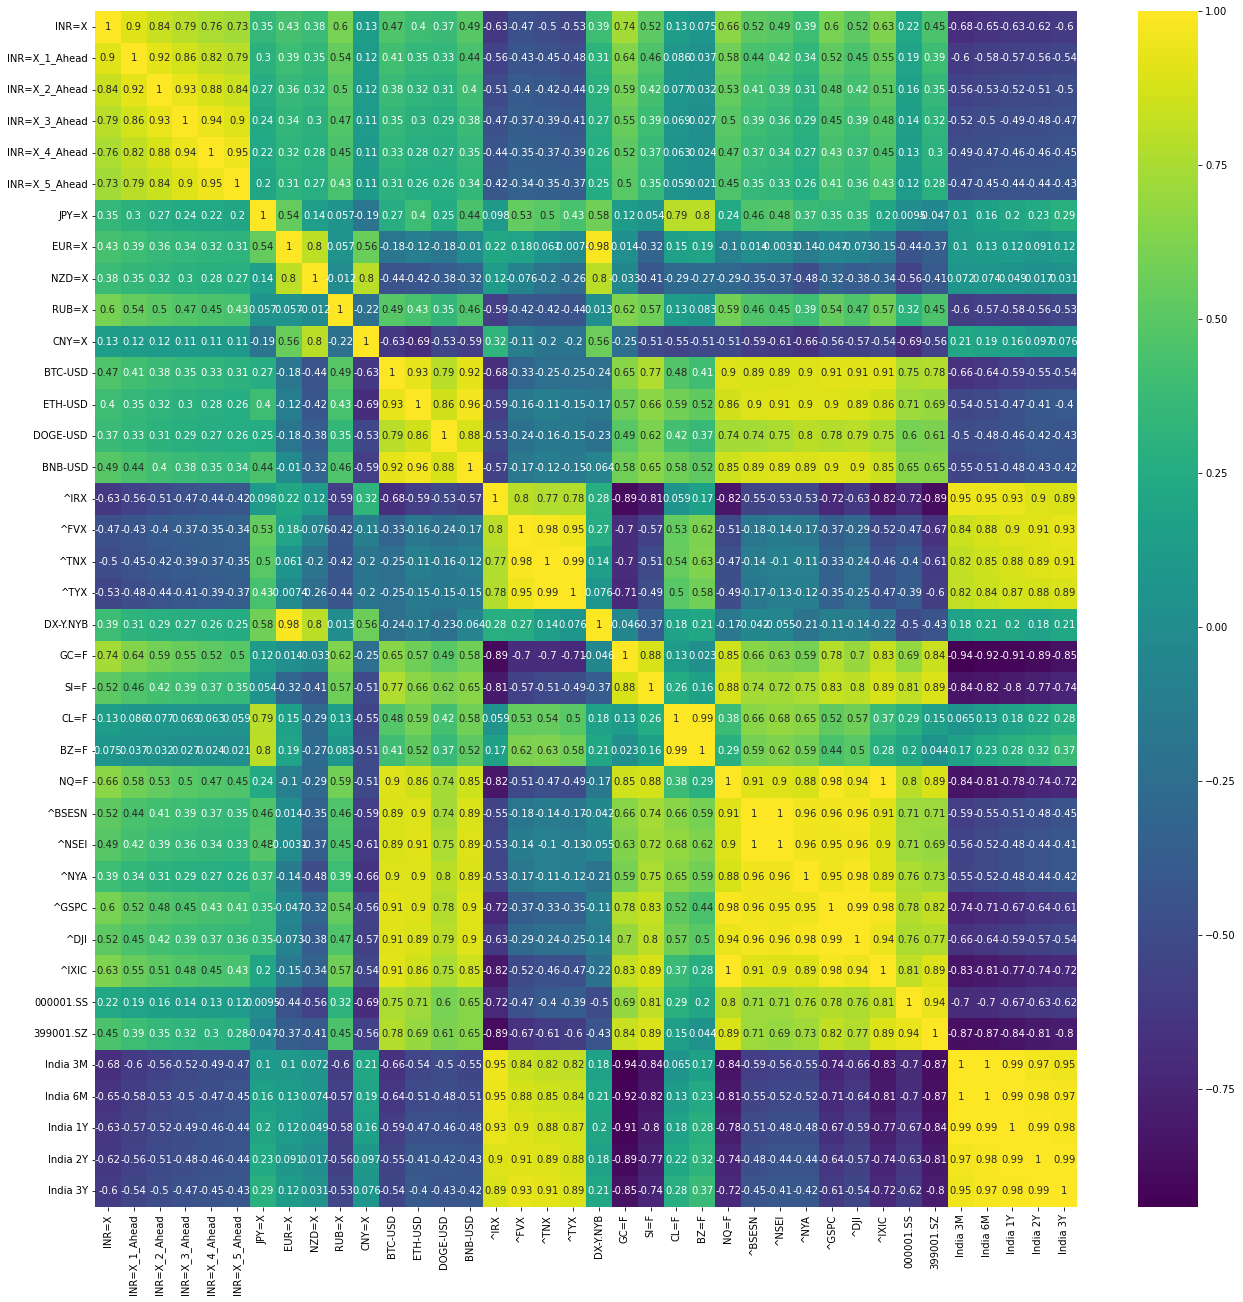

In [7]:
plt.figure(figsize=(22,22))
sns.heatmap(df_value.corr(),cmap="viridis", annot=True)

# Crypto Currency

<AxesSubplot:>

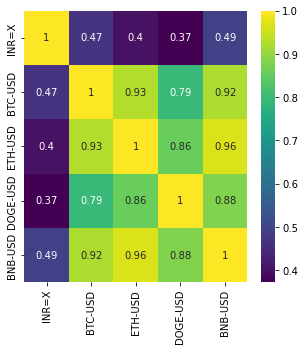

In [40]:
plt.figure(figsize=(5,5))
sns.heatmap(df_value[['INR=X','BTC-USD', 'ETH-USD', 'DOGE-USD', 'BNB-USD']].corr(),cmap="viridis", annot=True)

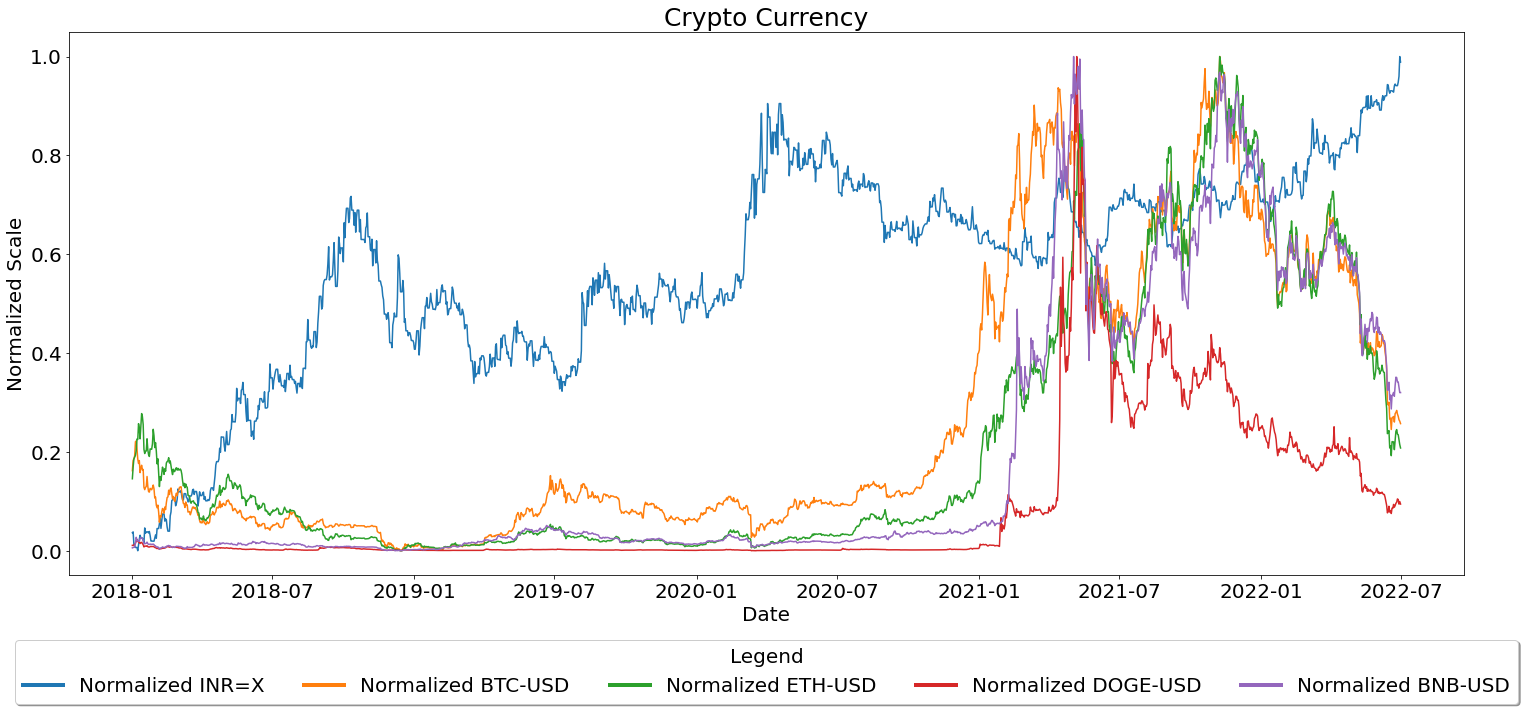

In [117]:
plt.figure(figsize=(25,10))
plots = ['INR=X','BTC-USD', 'ETH-USD', 'DOGE-USD', 'BNB-USD']
title = 'Crypto Currency'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)

leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

# Indian Government Bonds

<AxesSubplot:>

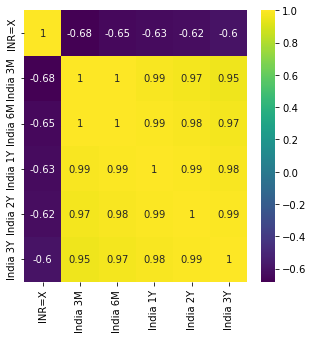

In [58]:
plt.figure(figsize=(5,5))
sns.heatmap(df_value[['INR=X','India 3M','India 6M','India 1Y','India 2Y','India 3Y']].corr(),cmap="viridis", annot=True)

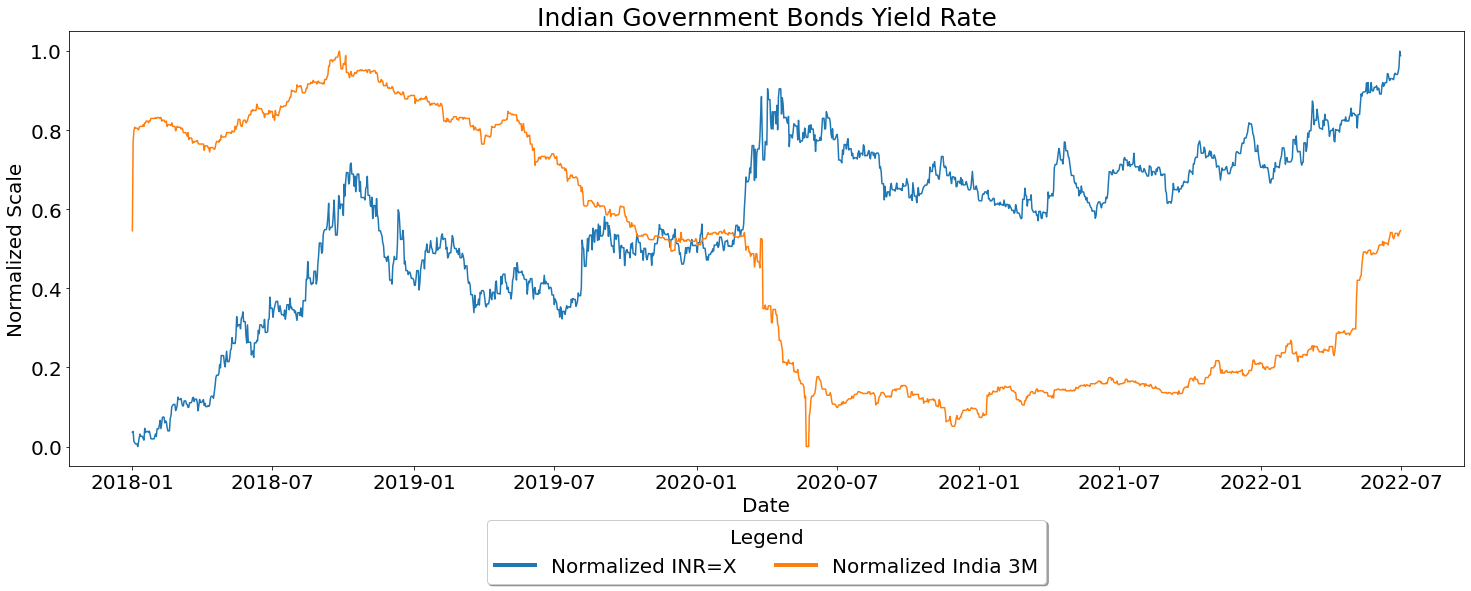

In [115]:
plt.figure(figsize=(25,8))
plots = ['INR=X','India 3M']
title = 'Indian Government Bonds Yield Rate'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)
    
leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

# US Treasury Bonds

<AxesSubplot:>

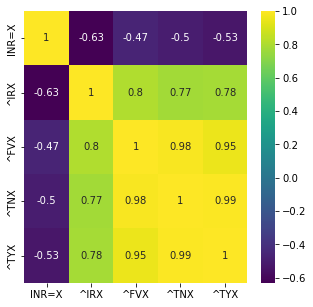

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(df_value[['INR=X','^IRX', '^FVX','^TNX', '^TYX']].corr(),cmap="viridis", annot=True)

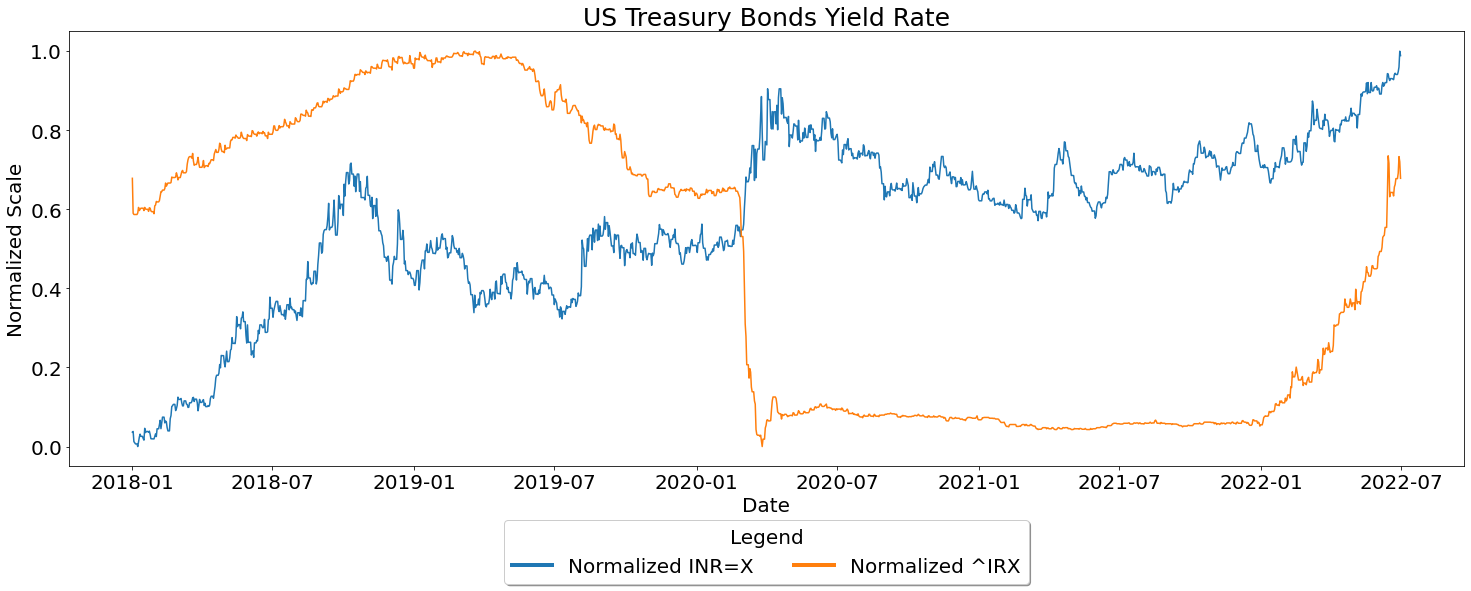

In [116]:
plt.figure(figsize=(25,8))
plots = ['INR=X','^IRX']
title = 'US Treasury Bonds Yield Rate'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)

leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

# Commodity

<AxesSubplot:>

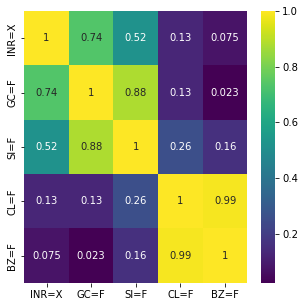

In [67]:
plt.figure(figsize=(5,5))
sns.heatmap(df_value[['INR=X','GC=F','SI=F','CL=F','BZ=F']].corr(),cmap="viridis", annot=True)

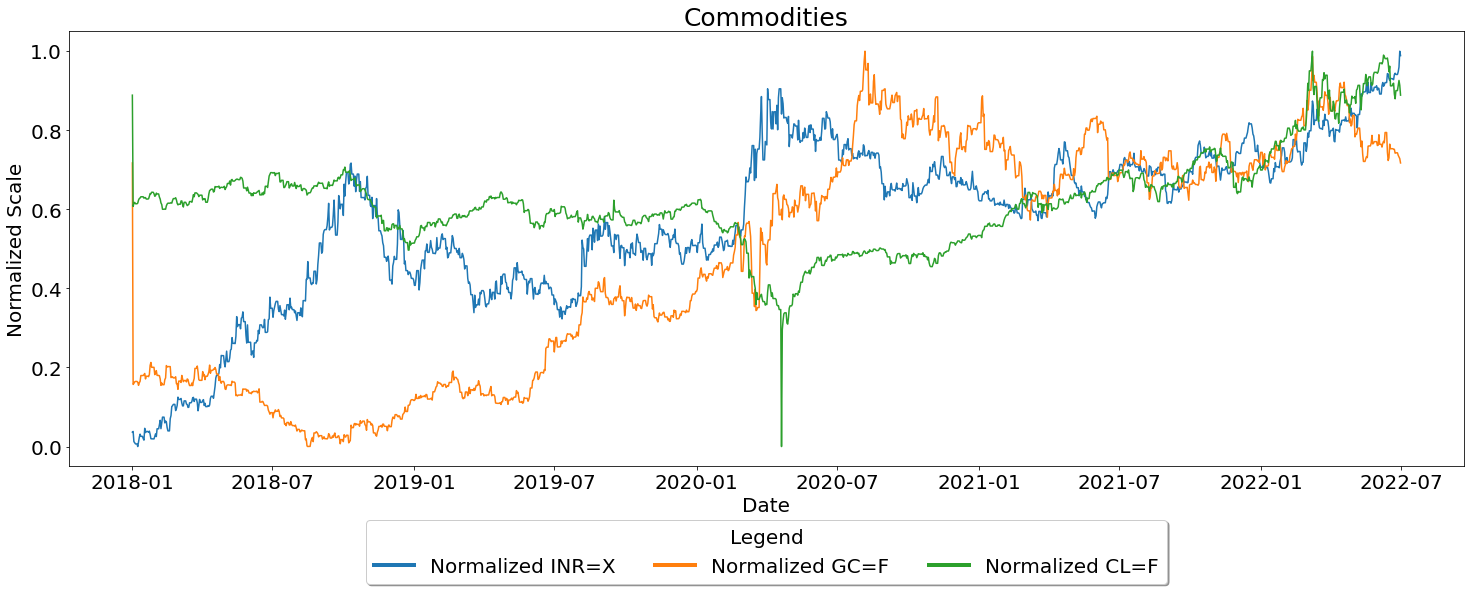

In [113]:
plt.figure(figsize=(25,8))
plots = ['INR=X','GC=F','CL=F']
title = 'Commodities'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)

leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

# Stock Markets

<AxesSubplot:>

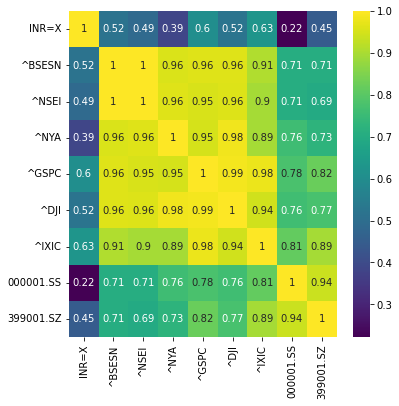

In [69]:
plt.figure(figsize=(6,6))
sns.heatmap(df_value[['INR=X','^BSESN','^NSEI','^NYA','^GSPC','^DJI','^IXIC','000001.SS','399001.SZ']].corr(),cmap="viridis", annot=True)

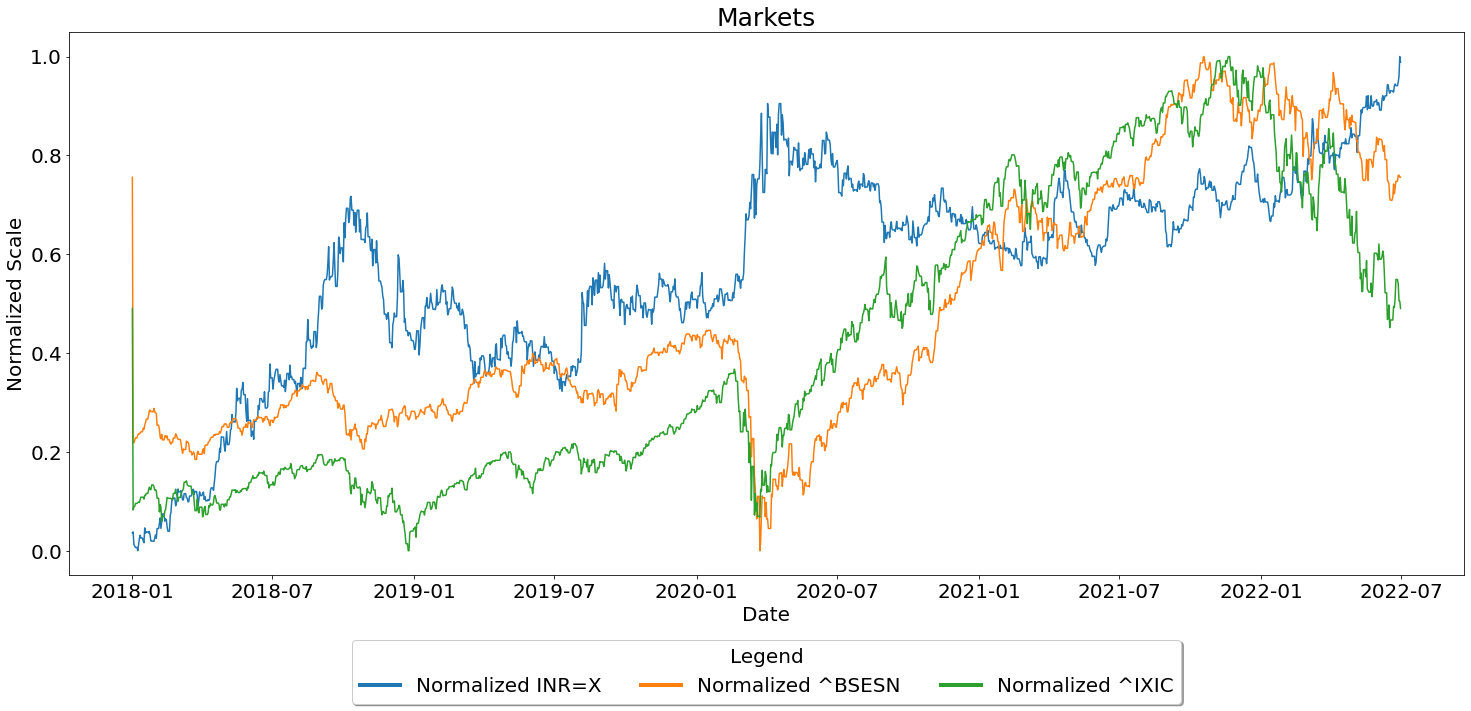

In [112]:
plt.figure(figsize=(25,10))
plots = ['INR=X','^BSESN','^IXIC']
title = 'Markets'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)

leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

# Dollar Index

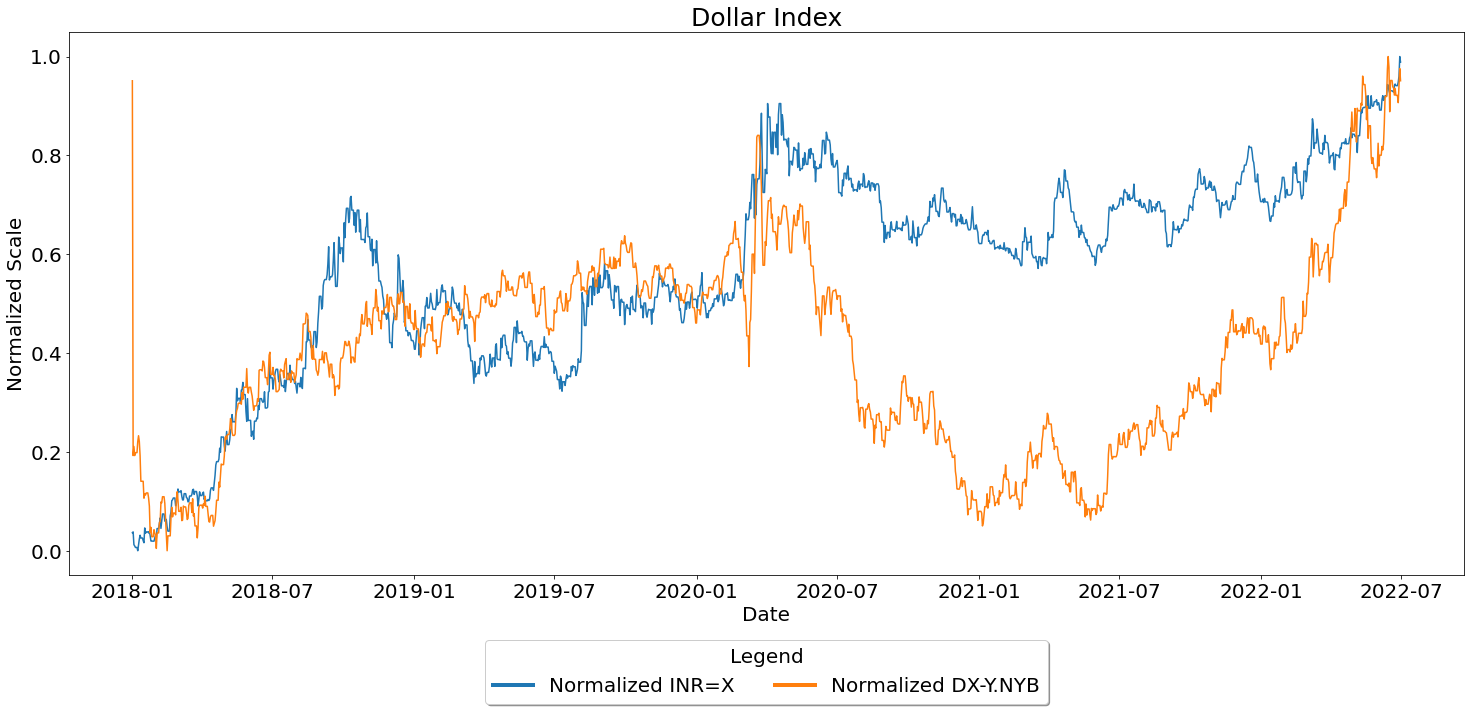

In [124]:
plt.figure(figsize=(25,10))
plots = ['INR=X','DX-Y.NYB']
title = 'Dollar Index'
for plot in plots:
    plt.plot((df_value[plot]-df_value[plot].min())/(df_value[plot].max()-df_value[plot].min()),label='Normalized '+plot)

leg = plt.legend(title='Legend',fontsize=20, title_fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True,ncol=5)

plt.title(title,fontsize=25)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Normalized Scale',fontsize=20)
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels

for line in leg.get_lines():
    line.set_linewidth(4.0)

plt.savefig("Images/"+title+".png", bbox_inches='tight',dpi=1000)
plt.show()

<AxesSubplot:>

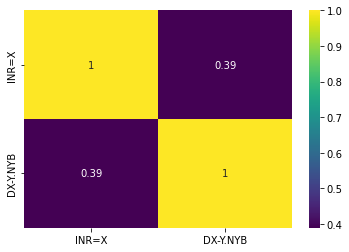

In [9]:
sns.heatmap(df_value[['INR=X','DX-Y.NYB']].corr(),cmap="viridis", annot=True)

# Recovery From Covid

In [ ]:
[abs(df_value.corr()['INR=X'])>0.5]['INR=X'].index

In [12]:
df_value.loc['2020-07-01':'2022-07-01'].corr()[abs(df_value.loc['2020-07-01':'2022-07-01'].corr()['INR=X'])>0.5]['INR=X'].index

Index(['INR=X', 'INR=X_1_Ahead', 'INR=X_2_Ahead', 'INR=X_3_Ahead',
       'INR=X_4_Ahead', 'INR=X_5_Ahead', 'JPY=X', 'EUR=X', 'NZD=X', '^IRX',
       '^FVX', '^TNX', '^TYX', 'DX-Y.NYB', 'SI=F', 'CL=F', 'BZ=F', '000001.SS',
       '399001.SZ', 'India 3M', 'India 6M', 'India 1Y', 'India 2Y',
       'India 3Y'],
      dtype='object')

All Parameters

<AxesSubplot:>

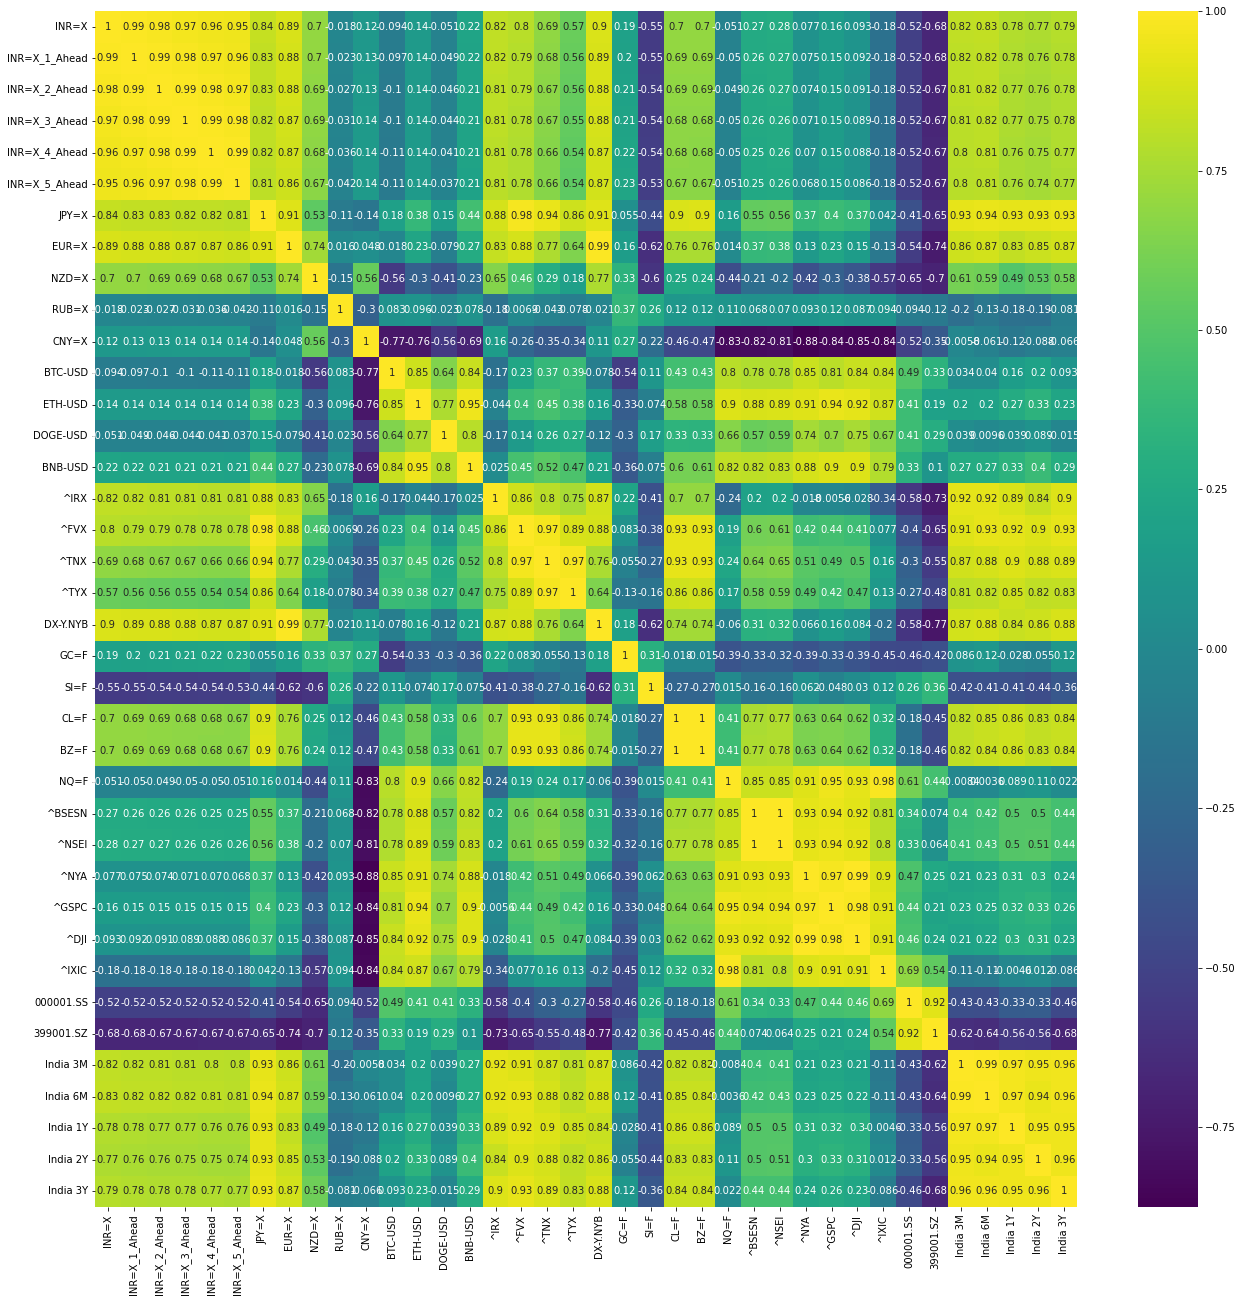

In [10]:
plt.figure(figsize=(22,22))
#df_use = 
sns.heatmap(df_value.loc['2020-07-01':'2022-07-01'].corr(),cmap="viridis", annot=True)

# Subparameters

In [14]:
df_value.columns

Index(['INR=X', 'INR=X_1_Ahead', 'INR=X_2_Ahead', 'INR=X_3_Ahead',
       'INR=X_4_Ahead', 'INR=X_5_Ahead', 'JPY=X', 'EUR=X', 'NZD=X', 'RUB=X',
       'CNY=X', 'BTC-USD', 'ETH-USD', 'DOGE-USD', 'BNB-USD', '^IRX', '^FVX',
       '^TNX', '^TYX', 'DX-Y.NYB', 'GC=F', 'SI=F', 'CL=F', 'BZ=F', 'NQ=F',
       '^BSESN', '^NSEI', '^NYA', '^GSPC', '^DJI', '^IXIC', '000001.SS',
       '399001.SZ', 'India 3M', 'India 6M', 'India 1Y', 'India 2Y',
       'India 3Y'],
      dtype='object')

<AxesSubplot:>

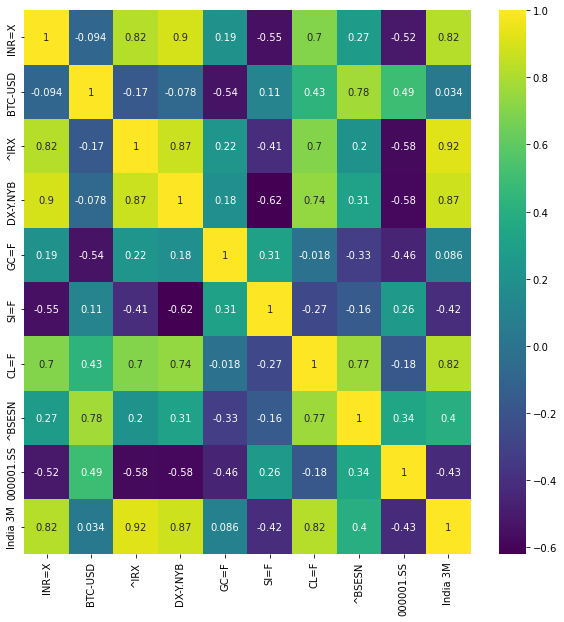

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df_value[['INR=X','BTC-USD','^IRX','DX-Y.NYB', 
                      'GC=F', 'SI=F', 'CL=F','^BSESN','000001.SS','India 3M']].loc['2020-07-01':'2022-07-01'].corr(),cmap="viridis", annot=True)

Final Considered Parameters that can be potential Input to the Prediction System

<AxesSubplot:>

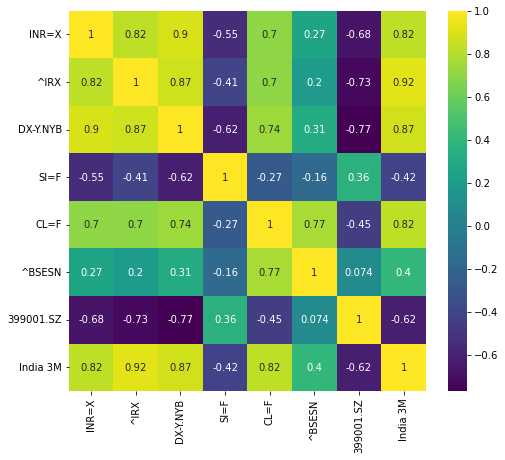

In [28]:
df_use = df_value[['INR=X','^IRX', 'DX-Y.NYB','SI=F', 'CL=F',
       '^BSESN', '399001.SZ', 'India 3M']].loc['2020-07-01':'2022-07-01'].corr()
plt.figure(figsize=(8,7))
sns.heatmap(df_use,cmap="viridis", annot=True)

In [19]:
df_value[['INR=X','^IRX', 'DX-Y.NYB','SI=F', 'CL=F',
       '^BSESN', '399001.SZ', 'India 3M']].loc['2020-07-01':'2022-07-01'].to_csv('use_data.csv',index=True)

In [21]:
df_value[['INR=X','^IRX', 'DX-Y.NYB','SI=F', 'CL=F','India 3M']].to_csv('all_data.csv',index=True)